In [1]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition

# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.

We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.


In [2]:
import pandas as pd
path=''  # si les données sont déjà dans le répertoire courant
loading = pd.read_csv(path+'velibLoading.csv', sep = " ")
loading.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [3]:
velibAdds = pd.read_csv(path+'velibAdds.csv', sep = " ")
velibAdds.head()

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

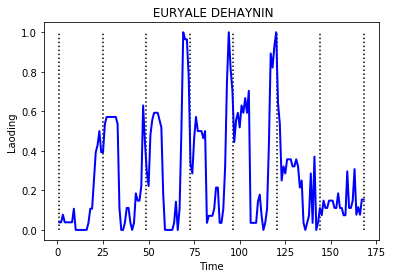

In [4]:
# Plot the loading of the first station
%matplotlib inline
from pylab import * 
import numpy as np

p = loading.columns.size
Time = np.linspace(1, p, p)
plot(Time, loading.transpose()[1], linewidth = 2, color = 'blue')
xlabel('Time'); ylabel('Laoding'); title(velibAdds.names[1])
vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "black", linestyle = "dotted")
show()

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?
3. Investigate the temporal correlation of the variables. 
For instance, for a given station, plot the loading at t+h versus loading at time t.
Visualize the correlation matrix by an image plot. Interpret the result.
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use a different color for stations which are located on a hill.
5. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

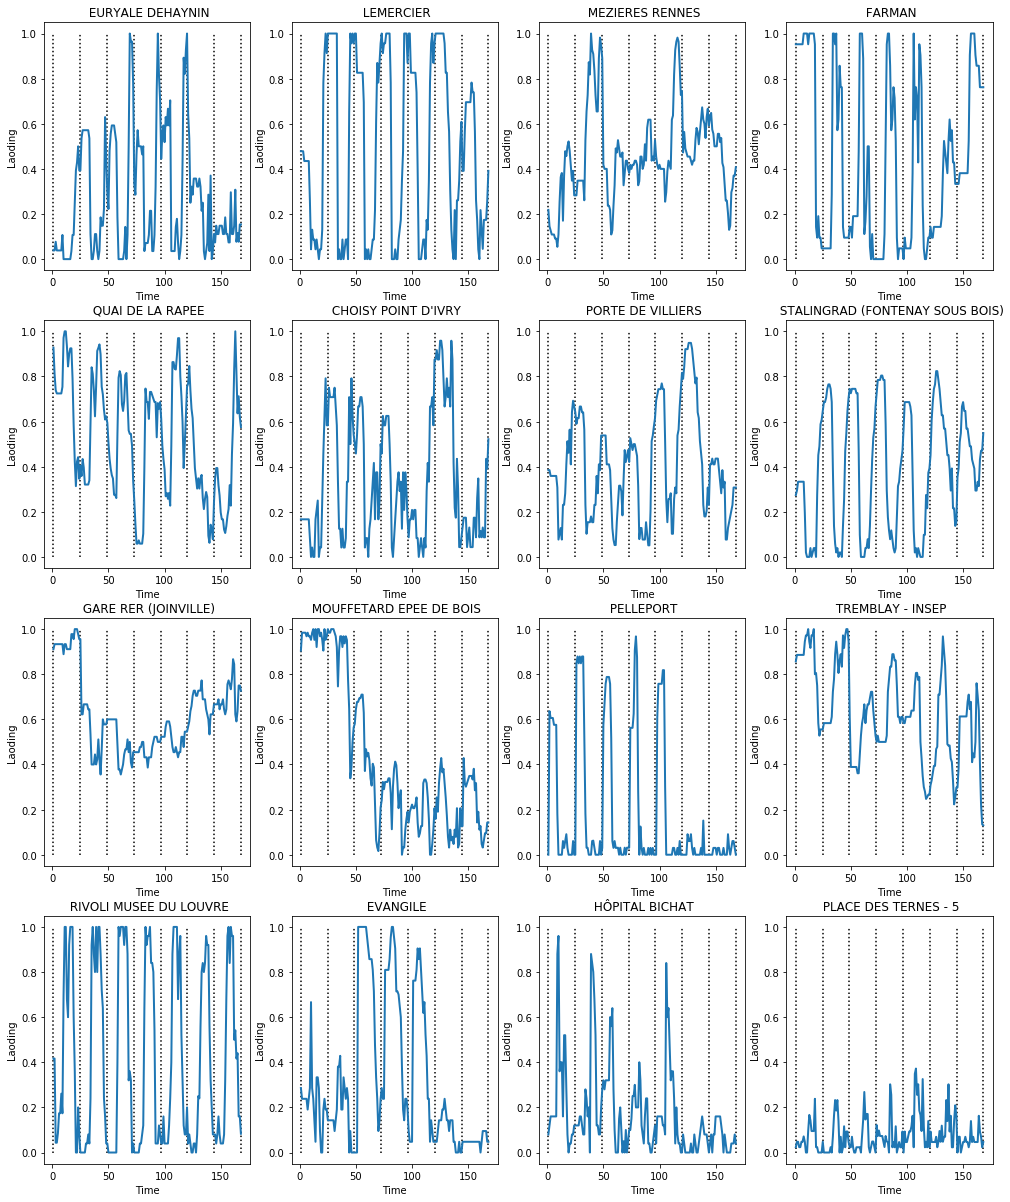

In [5]:
T16prem = loading.iloc[0:16]

p = loading.columns.size
Time = np.linspace(1, p, p)

plt.figure(1,figsize = (17, 21))
for k in range(16):
    ax = plt.subplot(4,4,k+1)
    plt.plot(Time, loading.transpose()[k+1], linewidth = 2)
    plt.xlabel('Time')
    plt.ylabel('Laoding')
    plt.title(velibAdds.names[k+1])
    vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "black", linestyle = "dotted")
plt.show()

In [6]:
print(len(loading.transpose()))

168


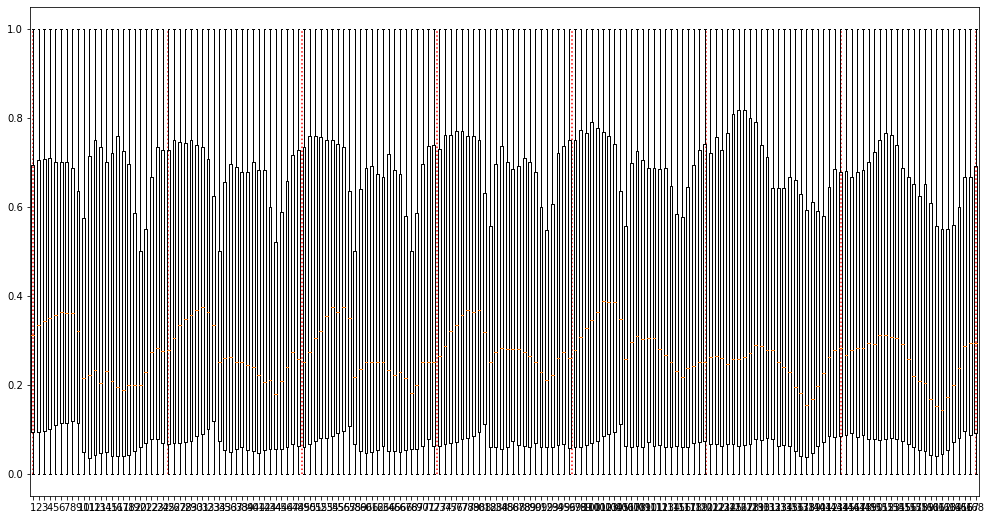

In [7]:
p = loading.columns.size
Time = np.linspace(1, p, p)

plt.figure(1,figsize = (17, 9))
plt.boxplot(loading.transpose())
vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "red", linestyle = "dotted")
plt.show()


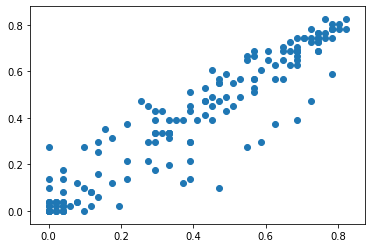

In [8]:
station = loading.iloc[7]
Station = np.array(station)
plt.scatter(Station,np.concatenate([Station[1:],[Station[0]]]))

plt.show()

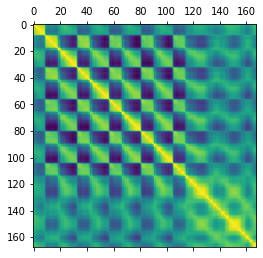

In [9]:
plt.matshow(loading.corr())

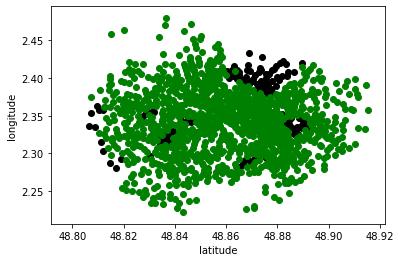

In [10]:
veliAddshills = velibAdds[velibAdds.bonus == 1]
veliAddsnohills = velibAdds[velibAdds.bonus == 0]

plt.figure(2)
plt.scatter(veliAddshills["latitude"],veliAddshills["longitude"],color="black")
plt.scatter(veliAddsnohills["latitude"],veliAddsnohills["longitude"],color="green")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

In [11]:
loadinghills = loading[velibAdds.bonus == 1]
loadinghills.transpose()[loadinghills.transpose().columns[0]]

Lun-00    0.000000
Lun-01    0.636364
Lun-02    0.606061
Lun-03    0.606061
Lun-04    0.606061
            ...   
Dim-19    0.030303
Dim-20    0.060606
Dim-21    0.060606
Dim-22    0.030303
Dim-23    0.000000
Name: 11, Length: 168, dtype: float64

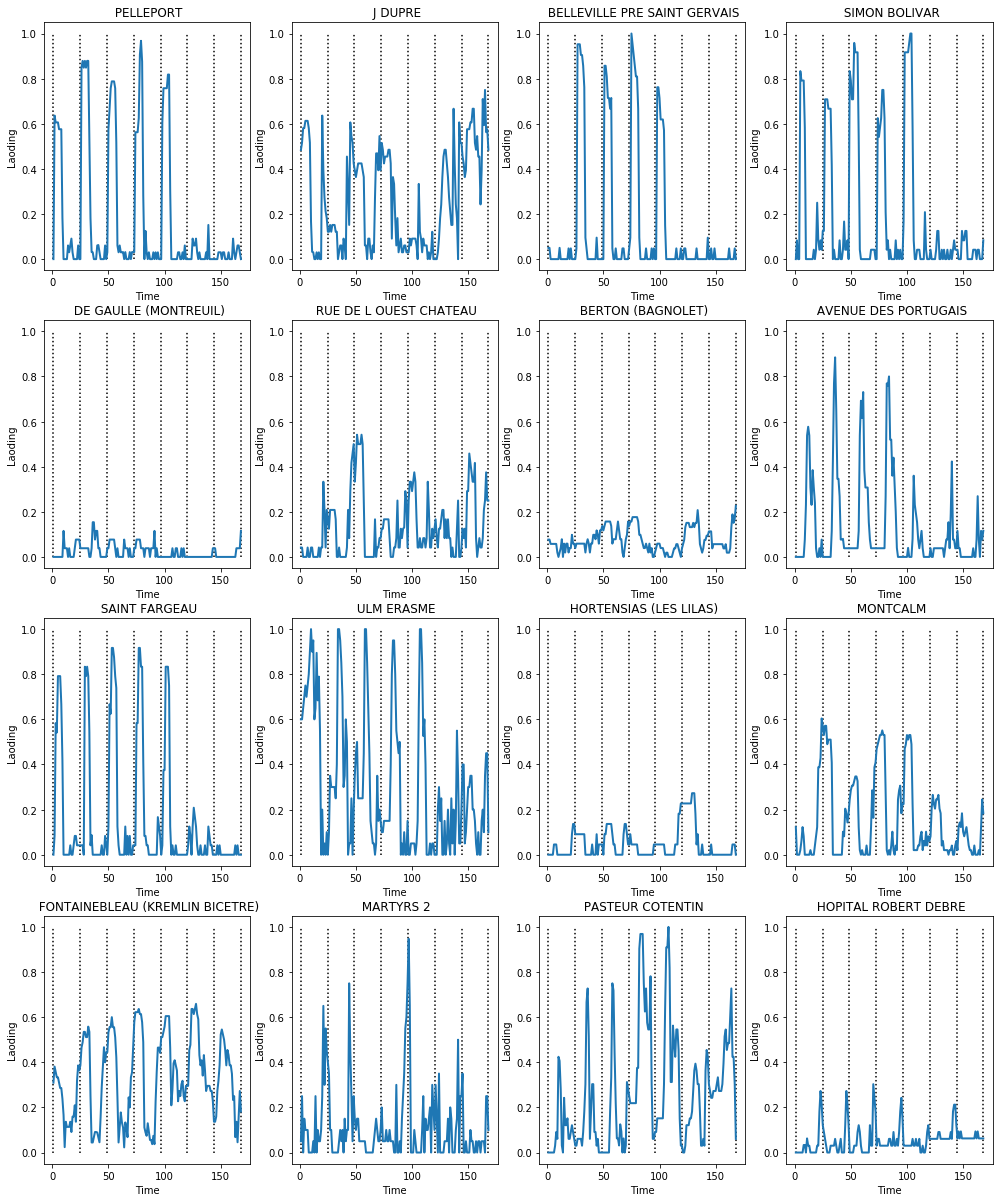

In [12]:
p = loadinghills.columns.size
Time = np.linspace(1, p, p)

plt.figure(3,figsize = (17, 21))
for k in range(16):
    ax = plt.subplot(4,4,k+1)
    plt.plot(Time, loadinghills.transpose()[loadinghills.transpose().columns[k]], linewidth = 2)
    plt.xlabel('Time')
    plt.ylabel('Loading')
    plt.title(veliAddshills.names[loadinghills.transpose().columns[k]])
    vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "black", linestyle = "dotted")
plt.show()

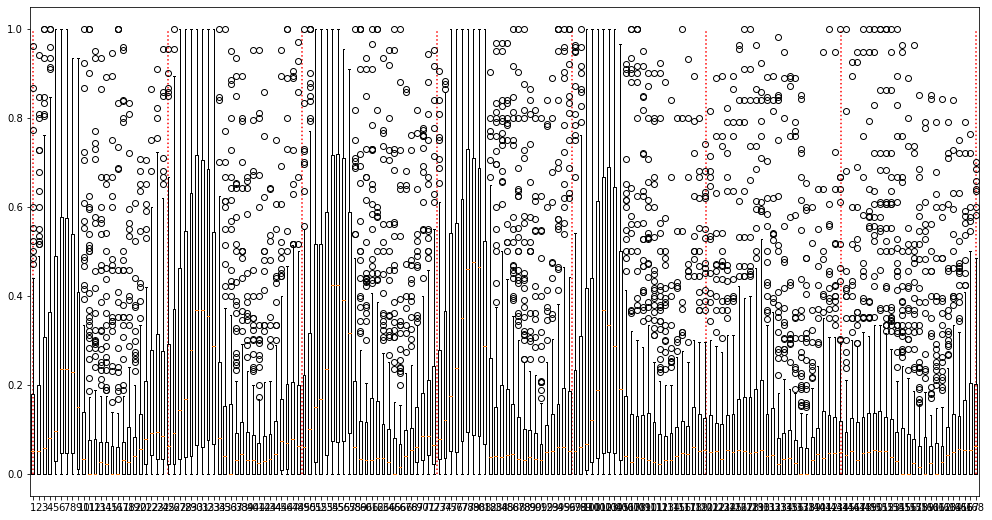

In [13]:
p = loadinghills.columns.size
Time = np.linspace(1, p, p)

plt.figure(1,figsize = (17, 9))
plt.boxplot(loadinghills.transpose())
vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "red", linestyle = "dotted")
plt.show()

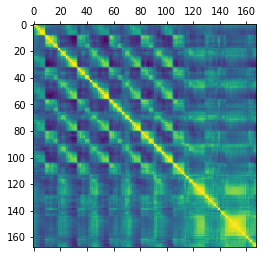

In [14]:
plt.matshow(loadinghills.corr())

In [15]:
loadingnohills = loading[velibAdds.bonus == 0]
loadingnohills.transpose()[loadingnohills.transpose().columns[0]]

Lun-00    0.038462
Lun-01    0.038462
Lun-02    0.076923
Lun-03    0.038462
Lun-04    0.038462
            ...   
Dim-19    0.076923
Dim-20    0.115385
Dim-21    0.076923
Dim-22    0.153846
Dim-23    0.153846
Name: 1, Length: 168, dtype: float64

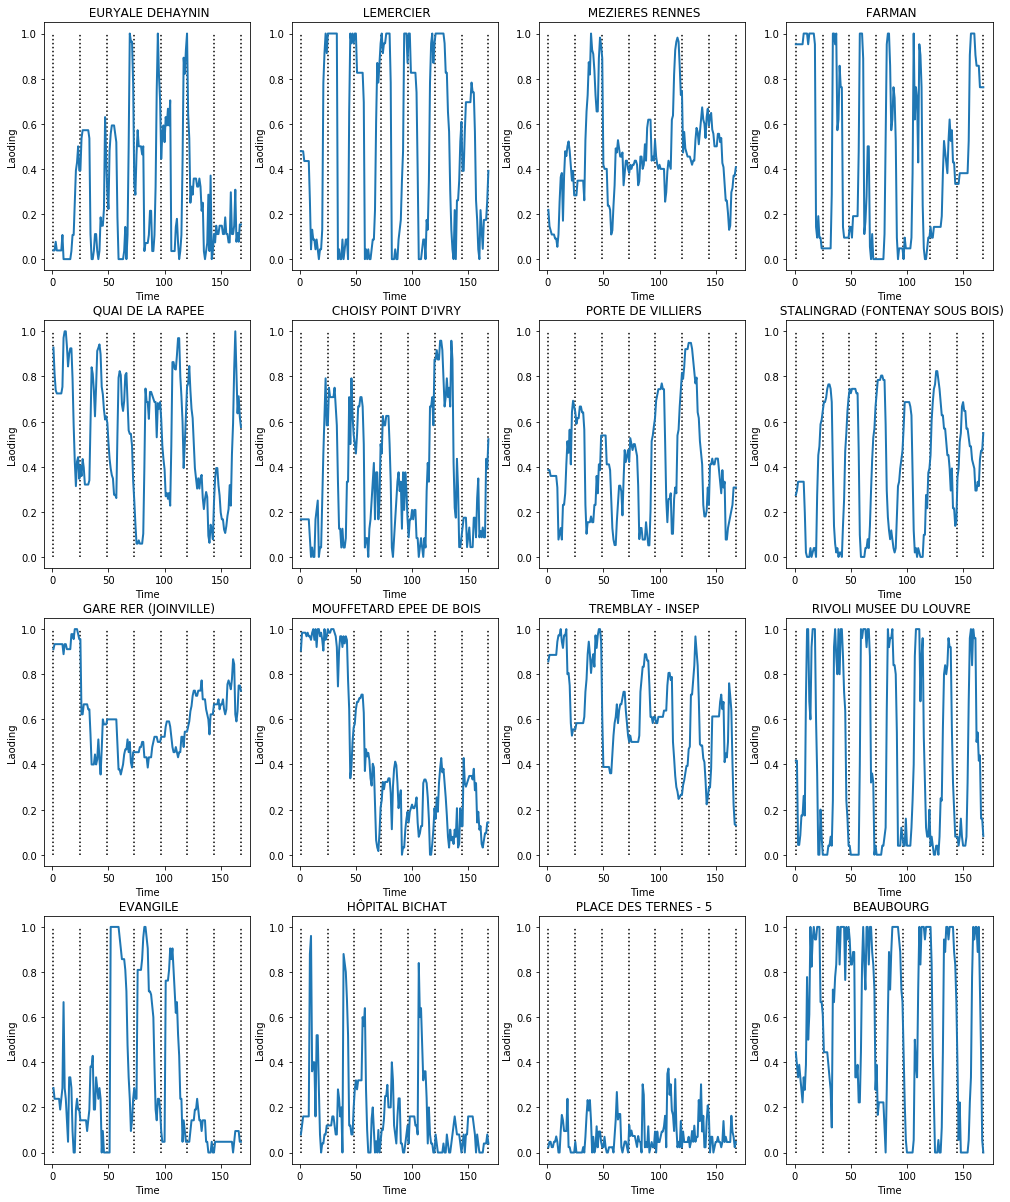

In [16]:
p = loadingnohills.columns.size
Time = np.linspace(1, p, p)

plt.figure(3,figsize = (17, 21))
for k in range(16):
    ax = plt.subplot(4,4,k+1)
    plt.plot(Time, loadingnohills.transpose()[loadingnohills.transpose().columns[k]], linewidth = 2)
    plt.xlabel('Time')
    plt.ylabel('Laoding')
    plt.title(veliAddsnohills.names[loadingnohills.transpose().columns[k]])
    vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "black", linestyle = "dotted")
plt.show()

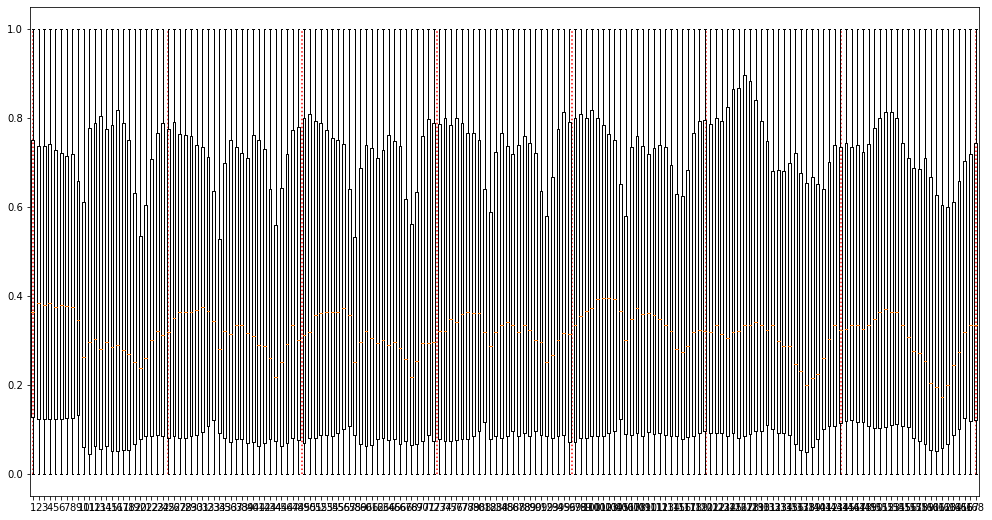

In [17]:
p = loadingnohills.columns.size
Time = np.linspace(1, p, p)

plt.figure(1,figsize = (17, 9))
plt.boxplot(loadingnohills.transpose())
vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "red", linestyle = "dotted")
plt.show()

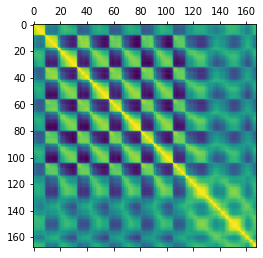

In [18]:
plt.matshow(loadingnohills.corr())

In [19]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

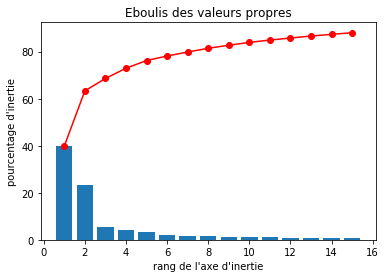

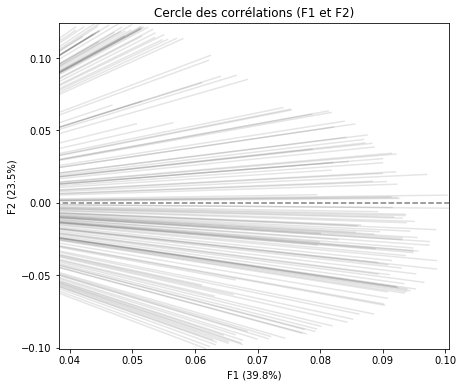

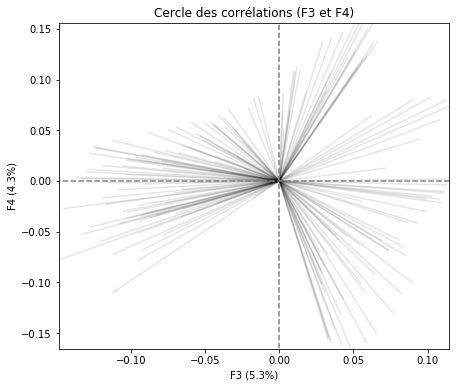

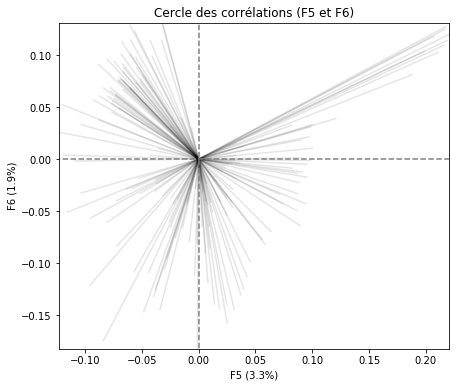

In [20]:
n_comp = 15

loadingR = preprocessing.scale(loading)

pca = decomposition.PCA(n_components=n_comp)
C = pca.fit(loadingR).transform(loadingR)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])

plt.show()

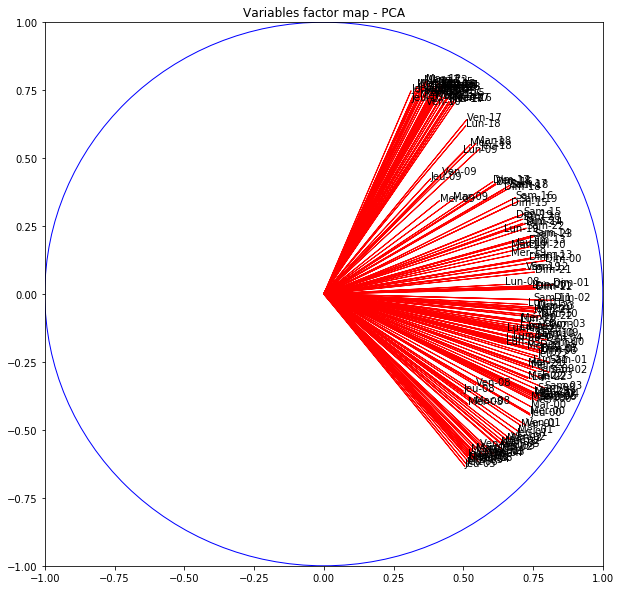

In [21]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, loading.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = ('r'), width = 0.0001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()

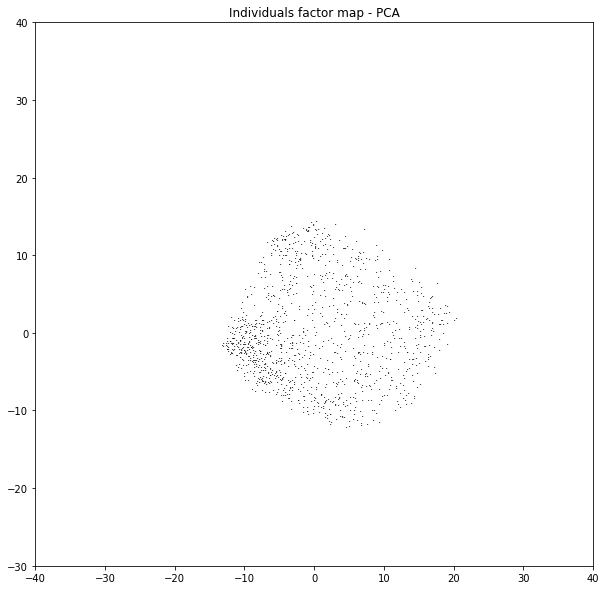

In [22]:
pc1 = C[:,0]
pc2 = C[:,1]
plt.figure(figsize = (10, 10))
for i, j in zip(pc1, pc2):
    plt.text(i, j, ".")
plt.axis((-40, 40, -30, 40))
plt.title('Individuals factor map - PCA')
plt.show()

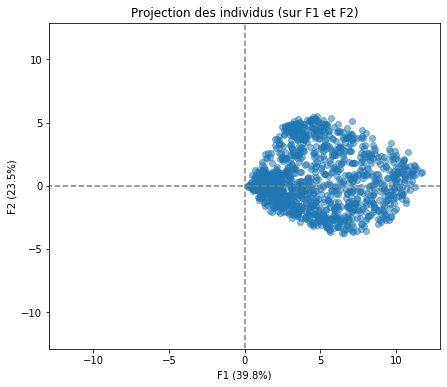

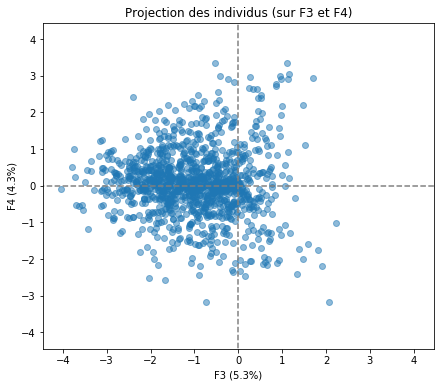

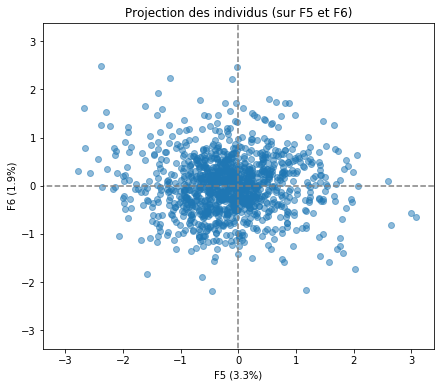

In [23]:
# Projection des individus
X_projected = pca.transform(loading)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], alpha = 0.5)

plt.show()

## Clustering

### KMeans

In [172]:
def affichageCourbes(y_pred,n_clusters,moyennes):
    plt.figure(3,figsize = (20, 20))
    for k in range(n_clusters):
        ax = plt.subplot(3,2,k+1)
        ind = np.where(y_pred == k)[0]
        for i in ind:
            y_affichage = loadingR[i]
            plt.plot(Time, y_affichage, linewidth = 0.1, color = "blue")
        plt.plot(Time, moyennes[k], linewidth = 2, color = "red")
        plt.xlabel('Time')
        plt.ylabel('LoadingR')
        plt.title(f"groupe {k}")
        vlines(x = np.linspace(1, p, 8), ymin = ylim()[0], ymax = ylim()[1], colors = "black", linestyle = "dotted")
    plt.show()

In [109]:
from sklearn.cluster import KMeans

In [110]:
n_clusters = 5
# Choix des options
kmeans = KMeans(n_clusters=n_clusters, random_state=76876)
# Exécution de l'algorithme
y_pred = kmeans.fit_predict(loadingR)

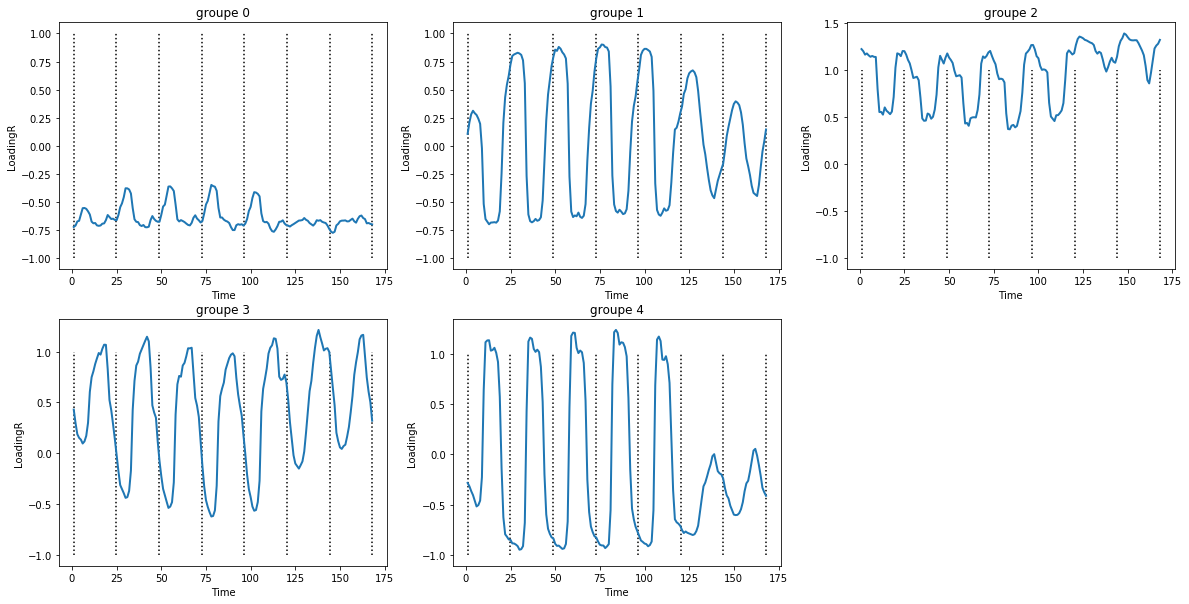

In [112]:
plt.figure(3,figsize = (20, 10))
for k in range(n_clusters):
    ax = plt.subplot(2,3,k+1)
    plt.plot(Time, kmeans.cluster_centers_[k], linewidth = 2)
    plt.xlabel('Time')
    plt.ylabel('LoadingR')
    plt.title(f"groupe {k}")
    vlines(x = np.linspace(1, p, 8), ymin = -1, ymax = 1, colors = "black", linestyle = "dotted")
plt.show()

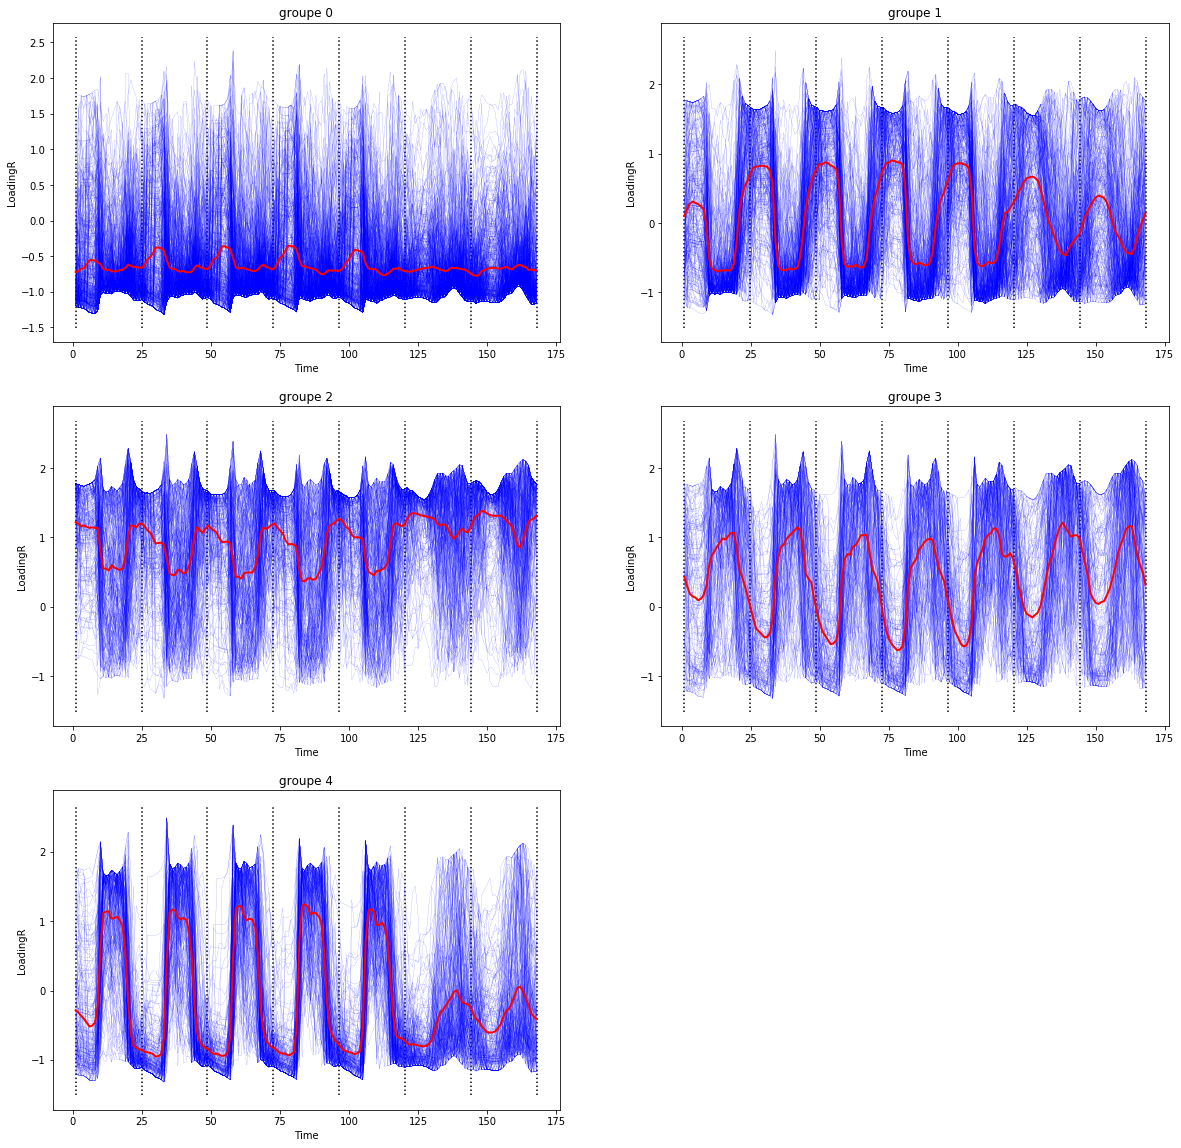

In [173]:
affichageCourbes(y_pred,n_clusters,kmeans.cluster_centers_)

In [174]:
C_pca5 = C[:,:5]

In [175]:
n_clusters = 5
# Choix des options
kmeans_pca5 = KMeans(n_clusters=n_clusters, random_state=76876)
# Exécution de l'algorithme
y_pred_pca5 = kmeans_pca5.fit_predict(C_pca5)
print(y_pred_pca5)

[2 2 3 ... 1 3 3]


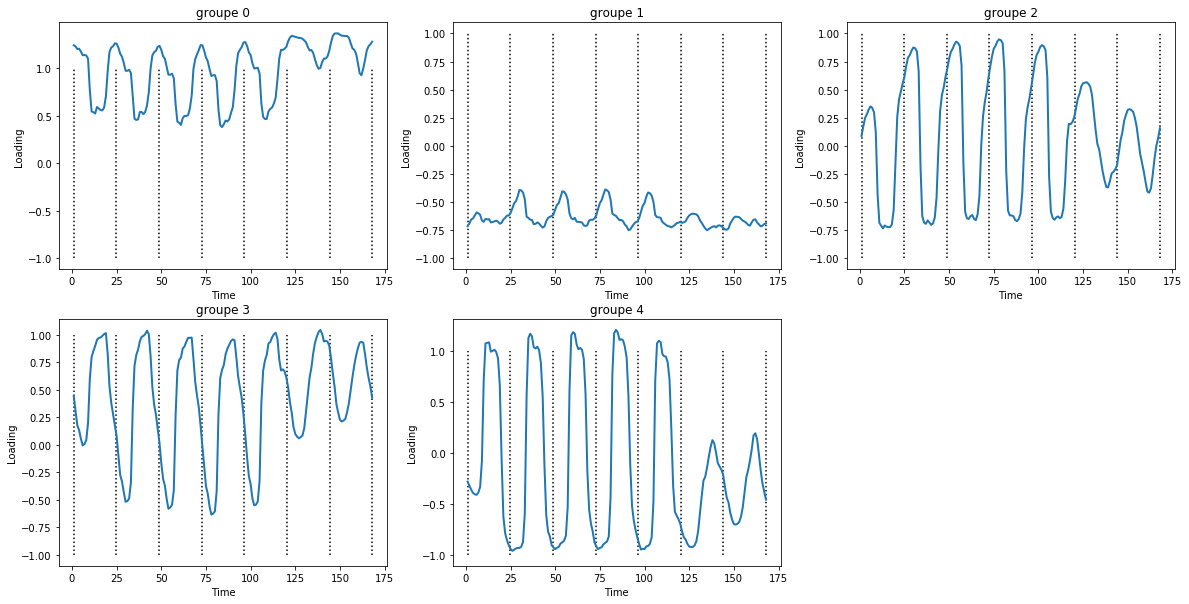

In [106]:
bar = kmeans_pca5.cluster_centers_
complement = np.zeros((n_clusters,10))
bar_inv = pca.inverse_transform(np.hstack((bar,complement)))


plt.figure(3,figsize = (20, 10))
for k in range(n_clusters):
    ax = plt.subplot(2,3,k+1)
    plt.plot(Time, bar_inv[k], linewidth = 2)
    plt.xlabel('Time')
    plt.ylabel('LoadingR')
    plt.title(f"groupe {k}")
    vlines(x = np.linspace(1, p, 8), ymin = -1, ymax = 1, colors = "black", linestyle = "dotted")
plt.show()

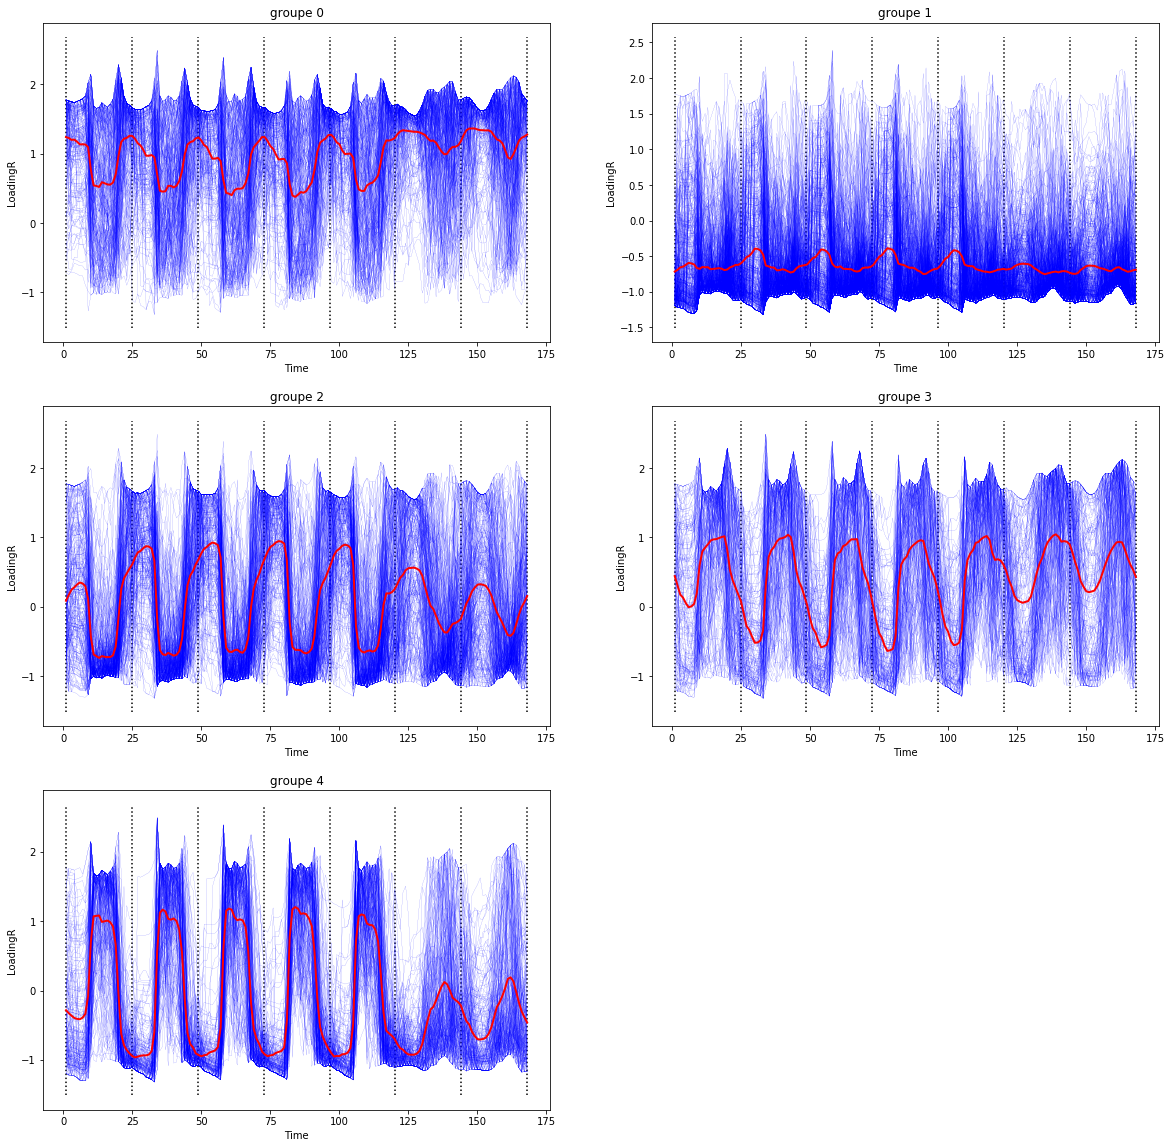

In [178]:
affichageCourbes(y_pred_pca5,n_clusters,bar_inv)

In [142]:
def affichageGeoClusters(velibAdds,y_pred,n_clusters, j = [k for k in range(n_clusters)]):
    plt.figure(figsize=(10,10))
    col = ["black","red","purple","green","blue"]
    for k in range(n_clusters):
        ind = np.where(y_pred == k)[0]
        for i in ind:
            plt.scatter(velibAdds["latitude"].iloc[i],velibAdds["longitude"].iloc[i],color=col[j[k]],s=35)
    plt.xlabel("latitude")
    plt.ylabel("longitude")
    plt.show()

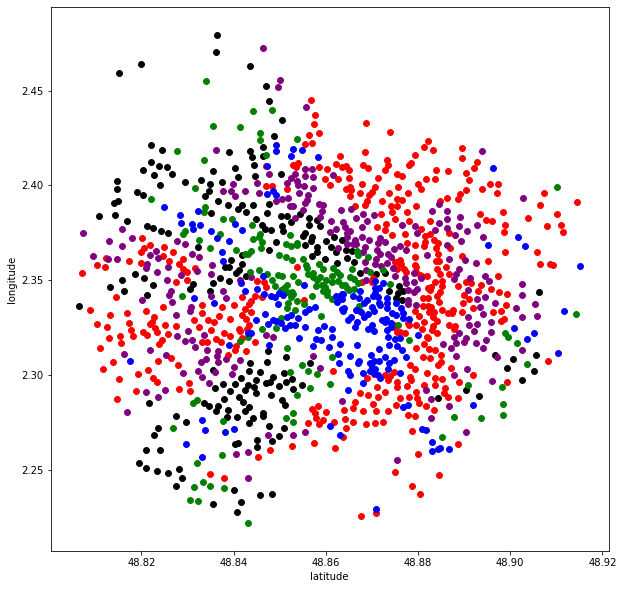

In [143]:
affichageGeoClusters(velibAdds,y_pred_pca5,n_clusters)

In [138]:
def crossTable(classe1, classe2):
    table = pd.crosstab(classe1, classe2, rownames = ['classes ACP'], colnames = ['classes données brutes'])
    a = np.zeros(np.shape(table)[0])
    b = np.zeros(np.shape(table)[0])
    for j in range (0, np.shape(table)[0]):
        for i in range (0, np.shape(table)[0]):
            if (a[j] < table[i][j]):
                a[j] = table[i][j]
                b[j] = i                       
                                             
    print ("")
    print ("max colonne", a)
    print ("j=", b)
    print ("")
    tablebis = np.copy(table)
    for i in range (0, np.shape(table)[0]):
        tablebis[i][:] = table[b[i]][:]        
    return tablebis

In [139]:
crossTable(y_pred,y_pred_pca5)


max colonne [406. 239. 208. 139. 182.]
j= [1. 2. 0. 3. 4.]



array([[406,   1,   0,   0,   1],
       [  0, 239,   0,   0,   0],
       [  0,   0, 208,   0,   0],
       [  0,   2,   5, 139,   3],
       [  0,   0,   0,   3, 182]], dtype=int64)

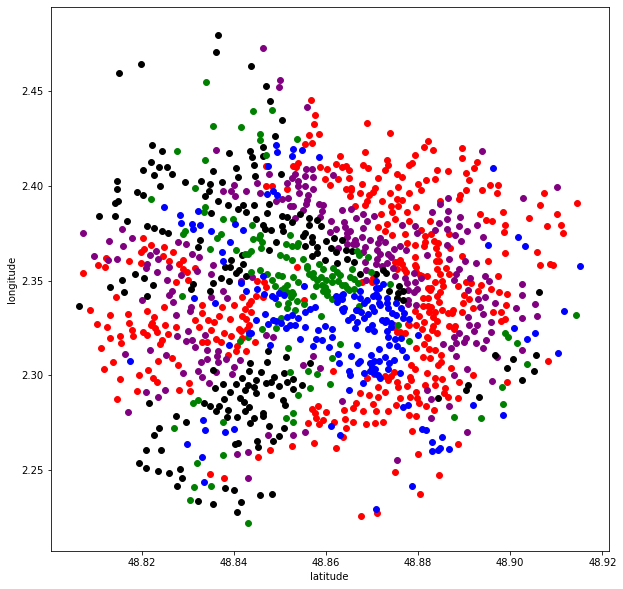

In [146]:
affichageGeoClusters(velibAdds,y_pred,n_clusters, [1, 2, 0, 3, 4])

## Mélange gaussien

In [164]:
from sklearn.mixture import GaussianMixture

In [165]:
gm = GaussianMixture(n_components=n_clusters, random_state=4254)
y_pred_gauss = gm.fit(loadingR).predict(loadingR)

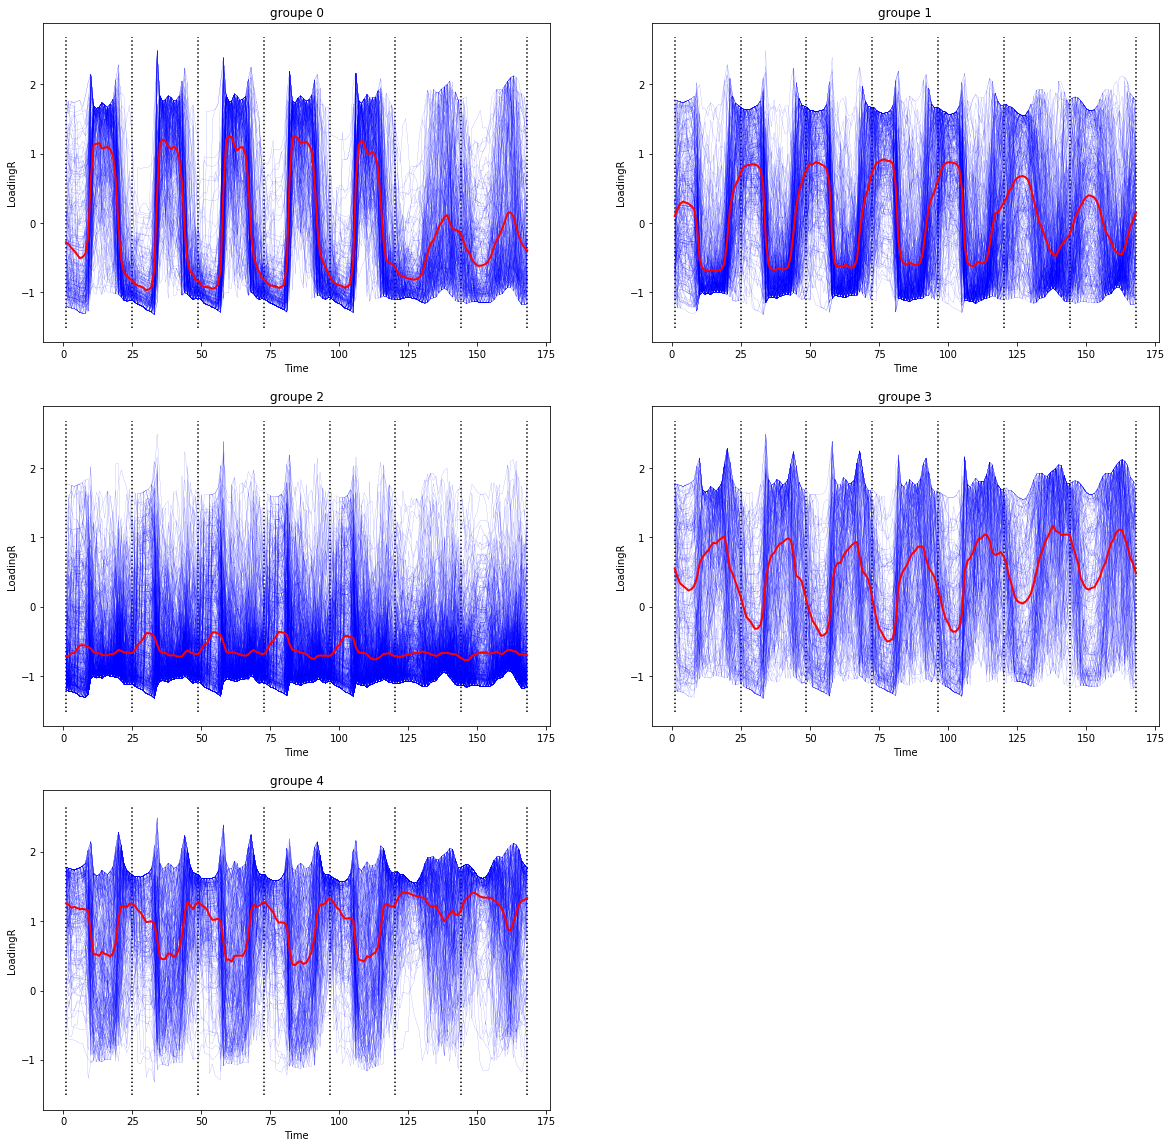

In [179]:
affichageCourbes(y_pred_gauss,n_clusters,gm.means_)

In [160]:
crossTable(y_pred_gauss,y_pred)


max colonne [181. 239. 406. 127. 192.]
j= [4. 1. 0. 3. 2.]



array([[181,   0,   5,   0,   0],
       [  0, 239,   0,   3,   0],
       [  0,   0, 406,   0,   0],
       [ 15,   0,   0, 127,   0],
       [  0,   2,   0,  19, 192]], dtype=int64)

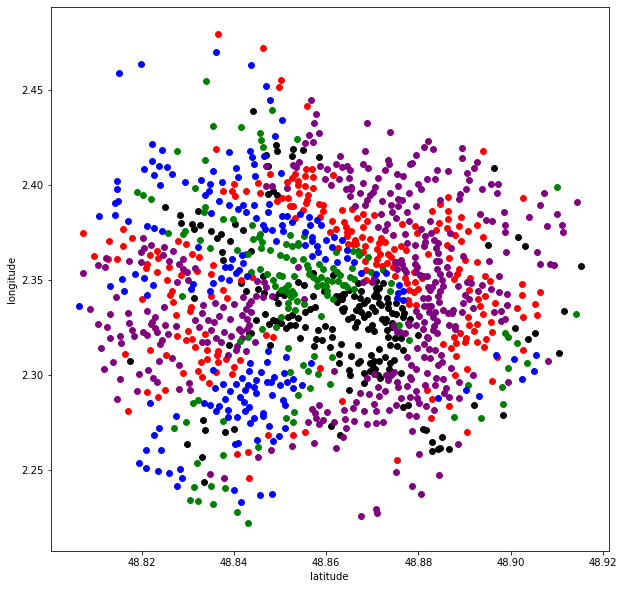

In [162]:
affichageGeoClusters(velibAdds,y_pred_gauss,n_clusters)

In [186]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score

def affichageSilhouette(f,X):
    plt.figure(figsize=(11, 9))

    for k in (3, 4, 5, 6):
        plt.subplot(2, 2, k - 2)
        method_per_k = [f(n_clusters=k, random_state=42).fit(X) for k in range(3, 7)]
        y_pred = method_per_k[k - 3].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)
        
        silhouette_scores = [silhouette_score(X, model.labels_) for model in method_per_k]

        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()
            cmap = matplotlib.cm.get_cmap("Spectral")
            color = cmap(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel("Cluster")

        if k in (5, 6):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)
    plt.show()

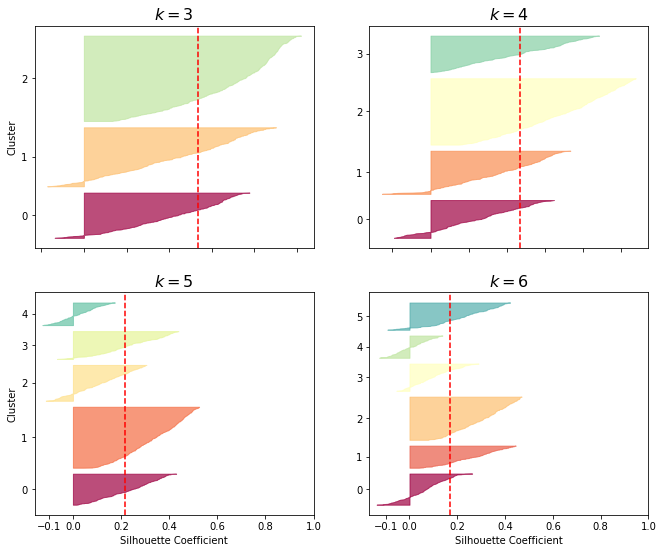

In [187]:
affichageSilhouette(KMeans,loadingR)